#Central Limit Theorem

The central limit theorem is one of the most important results in statistics.  It states that, under certain conditions, the distribution of the sample mean of a large number of independent random variables approaches a normal distribution, regardless of the shape of the original population distribution.

To understand this, let's look at what happens when we compute the average of a sample taken from a population distribution. 

## Population 
Let's begin with the same distribution used to understand the law of large numbers (LLN)

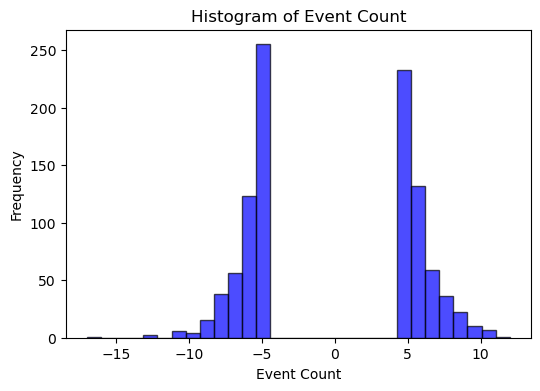

In [26]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt

# read in data 
path_data = '../../../assets/data/'
df = pd.read_excel(path_data + 'event_count_bimodal_distribution.xlsx')
data = df['Event_Count']

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Event Count')
plt.xlabel('Event Count')
plt.ylabel('Frequency')
plt.show()

## The sample mean
Let's say we take a sample of size n=5, and we take the average (mean). Now, let's repeat the calculation of our average many times (sample size n=5 each time). We get many different means that we can plot. Notice that they are very different. 

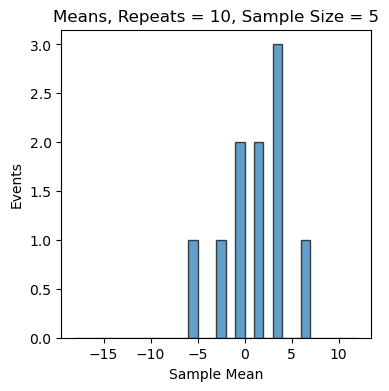

In [28]:
# Define the sample size and number of repetitions
sample_size = 5
num_repeats = 10

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 4))

# Perform sampling with the fixed sample size and the given number of repetitions
sample_means = []
for _ in range(num_repeats):
    sample = data.sample(sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

# Plotting the distribution of sample means
ax.hist(sample_means, bins=range(data.min()-1, data.max() + 1), edgecolor='black', alpha=0.7, density=False)
ax.set_title(f'Means, Repeats = {num_repeats}, Sample Size = {sample_size}', rotation=0, ha='center')
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Events')
ax.autoscale(enable=True, axis='y')
plt.show()

## What is the distribution of $\bar{X}$? 

### Small sample size, lots of repeats
Let's consider what happens when we compute the means many times. For a sample size of 5, we calculate the mean 10, 100, and 1000 times. The more we calculate this, the more the distribution looks normal. However, we have to calculate the mean **a lot** at n=5. 

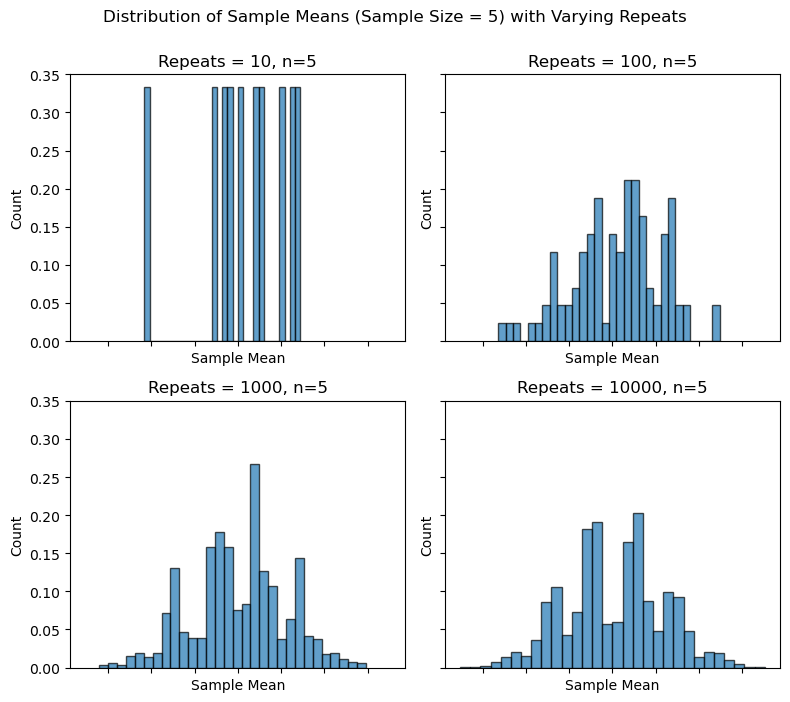

In [35]:
sample_size = 5
num_repeats = [10, 100, 1000, 10000]

# Adjust the number of rows and columns to fit all subplots
fig, axes = plt.subplots(3, 2, figsize=(8, 10), sharex=True, sharey=True)

# Perform sampling with the fixed sample size and varying repetitions
for j, repeat in enumerate(num_repeats):
    sample_means = []
    for _ in range(repeat):
        sample = data.sample(sample_size, replace=True)  # Sample with replacement
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    
    # Determine the position in the grid
    row = j // 2
    col = j % 2
    
    # Plotting the distribution of sample means
    ax = axes[row, col]
    ax.hist(sample_means, bins=30, edgecolor='black', alpha=0.7, density=True)
    ax.set_title(f'Repeats = {repeat}, n={sample_size}', rotation=0, ha='center')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Count')

# Hide any unused subplots
for i in range(j + 1, axes.size):
    fig.delaxes(axes.flatten()[i])

# Set the overall title for the figure
fig.suptitle(f'Distribution of Sample Means (Sample Size = {sample_size}) with Varying Repeats', y=1)
plt.tight_layout()
plt.show()

### Large sample size
Now consider what happens when we increase the sample size (n). We notice two things: the larger our sample size (n), the more normal the distribution, and the smaller the variance. This is a very important result. 

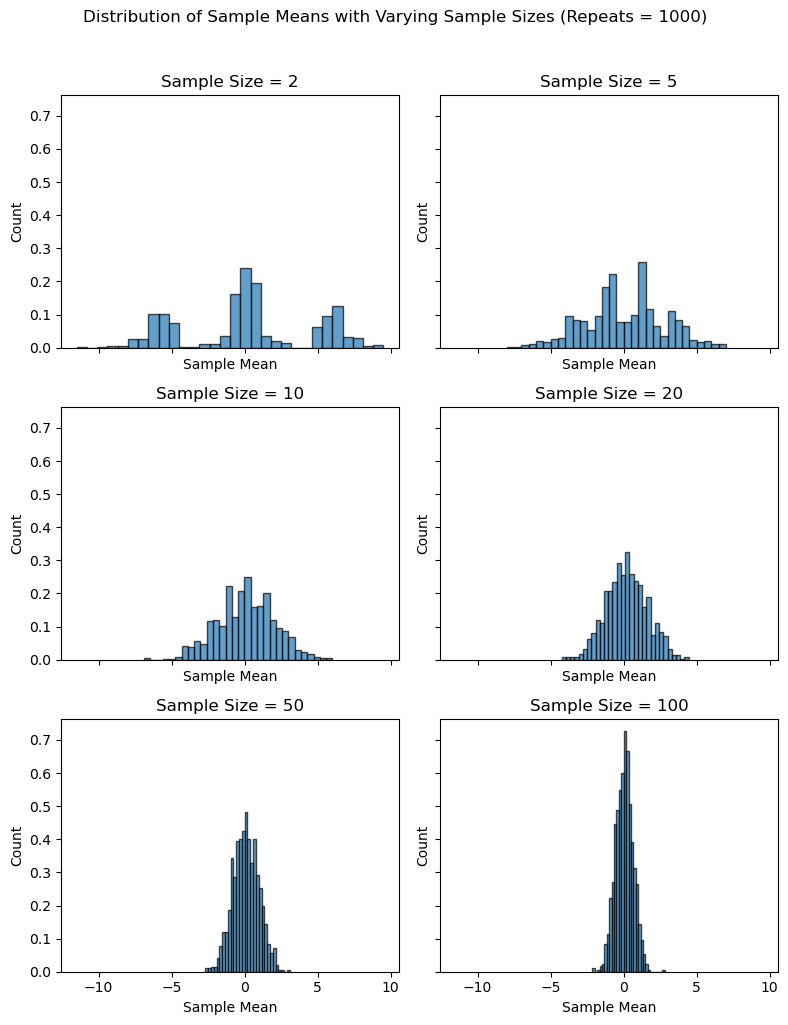

In [36]:
# Vary the sample size with a fixed number of repeats
sample_sizes = [2, 5, 10, 20, 50, 100]
num_repeats = 1000

# Adjust the number of rows and columns to fit all subplots
fig, axes = plt.subplots(3, 2, figsize=(8, 10), sharex=True, sharey=True)

# Perform sampling with varying sample sizes and a fixed number of repetitions
for j, sample_size in enumerate(sample_sizes):
    sample_means = []
    for _ in range(num_repeats):
        sample = data.sample(sample_size, replace=True)  # Sample with replacement
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    
    # Determine the position in the grid
    row = j // 2
    col = j % 2
    
    # Plotting the distribution of sample means
    ax = axes[row, col]
    ax.hist(sample_means, bins=30, edgecolor='black', alpha=0.7, density=True)
    ax.set_title(f'Sample Size = {sample_size}', rotation=0, ha='center')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Count')

# Set the overall title for the figure
fig.suptitle('Distribution of Sample Means with Varying Sample Sizes (Repeats = 1000)', y=1.02)
plt.tight_layout()
plt.show()


## Summary of the CLT
We've now seen that the Central Limit Theorem (CLT) in action. It gives us a remarkable result that is used througout all of statistics.

**Distribution of Sample Means**
The sampling distribution of the sample mean $ \bar{X} $ approaches a normal distribution as the sample size $ n $ becomes large:

$$
   \bar{X} \sim N\left( \mu, \frac{\sigma^2}{n} \right)
$$

**Mean of the Sampling Distribution:**
The mean of the sample means will be equal to the population mean

$$
   \mu_{\bar{X}} = \mu
$$

**Standard Deviation of the Sampling Distribution (Standard Error):**
The standard deviation of the sample means (known as the standard error) will be the population standard deviation (σ) divided by the square root of the sample size (n)

$$
   \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
$$